# VAR模型

## 原理讲解

可以参考公众号：[Stata: VAR (向量自回归) 模型](https://mp.weixin.qq.com/s/OxG-sk1MJUB8HV9V6y6Byw)

我们常常同时关心几个经济变量的预测，比如 GDP 增长率与失业率。一种方法是用单变量时间序列的方法对每个变量分别作预测。另一种方法则是将这些变量放在一起，作为一个系统来预测，以使得预测相互自洽（ mutually consistent），这称为"多变量时间序列"（multivariate time series）。由 Sims（1980）所提倡的"向量自回归"（ Vector Autoregression，简记 VAR）正是这样一种方法。
假设有两个时间序列变量 {$y_{11}, y_{2 t}$}, 分别作为两个回归方程的被解释变量, 而解释变量为这两个变量的 $p$ 阶滞后值, 构成一个二元 ( bivariate) 的 $\operatorname{VAR}(p)$ 系统：

$$\left\{\begin{array}{l}
y_{1 t}=\beta_{10}+\beta_{11} y_{1, t-1}+\cdots+\beta_{1 p} y_{1, t-p}+\gamma_{11} y_{2, t-1}+\cdots+\gamma_{1 p} y_{2, t-p}+\varepsilon_{1 t} \\
y_{2 t}=\beta_{20}+\beta_{21} y_{1, t-1}+\cdots+\beta_{2 p} y_{1, t-p}+\gamma_{21} y_{2, t-1}+\cdots+\gamma_{2 p} y_{2, t-p}+\varepsilon_{2 t}
\end{array}\right.\tag{1}$$

其中 {$\varepsilon_{1t}$} 与 {$\varepsilon_{2t}$} 均为白噪声过程，但允许两个方程的扰动项之间存在同期相关性

$$\operatorname{Cov}\left(\varepsilon_{1 t}, \varepsilon_{2 s}\right)=\left\{\begin{array}{c}
\sigma_{12}, \text { 若 } t=s \\0, \text { ,其他 }\end{array}\right.\tag{2}$$

注意到上面两个方程的解释变量完全一样.将两个方程写在一起:

$$\left(\begin{array}{l}
y_{1 t} \\
y_{2 t}
\end{array}\right)=\left(\begin{array}{l}
\beta_{10} \\
\beta_{20}
\end{array}\right)+\left(\begin{array}{ll}
\beta_{11} & \gamma_{11} \\
\beta_{21} & \gamma_{21}
\end{array}\right)\left(\begin{array}{l}
y_{1, t-1} \\
y_{2, i-1}
\end{array}\right)+\cdots+\left(\begin{array}{ll}
\beta_{1 p} & \gamma_{1 p} \\
\beta_{2 p} & \gamma_{2 p}
\end{array}\right)\left(\begin{array}{l}
y_{1, t-p} \\
y_{2, t-p}
\end{array}\right)+\left(\begin{array}{c}
\varepsilon_{1 t} \\
\varepsilon_{2 t}
\end{array}\right)\tag{3}$$

记 $\boldsymbol{y}_{t} \equiv\left(\begin{array}{l}y_{1 t} \\ y_{2 t}\end{array}\right), \boldsymbol{\varepsilon}_{t} \equiv\left(\begin{array}{c}\boldsymbol{\varepsilon}_{1 t} \\ \boldsymbol{\varepsilon}_{2 t}\end{array}\right)$ ，则有：

$$\boldsymbol{y}_{t}=\underbrace{\left(\begin{array}{l}
\beta_{10} \\
\beta_{20}
\end{array}\right)}_{\Gamma_{0}}+\underbrace{\left(\begin{array}{ll}
\beta_{11} & \gamma_{11} \\
\beta_{21} & \gamma_{21}
\end{array}\right)}_{\Gamma_{1}} \boldsymbol{y}_{t-1}+\cdots+\underbrace{\left(\begin{array}{ll}
\beta_{1 p} & \gamma_{1 p} \\
\beta_{2 p} & \gamma_{2 p}
\end{array}\right)}_{\Gamma_{p}} \boldsymbol{y}_{t-p}+\boldsymbol{\varepsilon}_{t}\tag{4}$$

这个形式与 AR($p$) 很相似，故名“ VAR（p）”。

### 滞后阶数选择
在进行VAR建模时，需要确定变量的滞后阶数，以及VAR系统中包含几个变量。

#### 信息准则
根据残差 $\hat{\varepsilon}_{t}$ 可以估计协方差矩阵 $\boldsymbol{\Sigma},$ 记为 $\hat{\boldsymbol{\Sigma}}_{\circ}$ 矩阵 $\hat{\boldsymbol{\Sigma}}$ 的 $(i, j)$ 元素为 $\hat{\mathbf{\Sigma}}_{i j} \equiv \frac{1}{T} \sum_{i=1}^{T} \hat{\varepsilon}_{i i} \hat{\varepsilon}_{j t},$ 其中 $T$ 为样本容量。则 $\mathrm{VAR}$ 模型的 AIC 与 BIC 分别为：

$$\operatorname{AIC}(p) \equiv \ln |\hat{\mathbf{\Sigma}}|+n(n p+1) \frac{2}{T}\tag{5}$$

$$\operatorname{BIC}(p) \equiv \ln |\hat{\mathbf{\Sigma}}|+n(n p+1) \frac{\ln T}{T}\tag{6}$$

其中, $n$ 为 VAR 系统中变量的个数，p 为滞后阶数 $,|\hat{\mathbf{\Sigma}}|$ 为 $\hat{\mathbf{\Sigma}}$ 的行列式 $,$ 而 $n(n p+1)$ 为 $\operatorname{VAR}$ 模型中待估系数之总数 (每个方程共有 ( $n p+1$ ) 个系数, 共有 $n$ 个方程)。将 | $\hat{\mathbf{\Sigma}} |$ 视为多维情形下的残差平方和,则以上表达式为单一方程的信息准则向多方程情形的推广。比如，当 $n=1$ 时,$\hat{\mathbf{\Sigma}}$ 为 1 阶矩阵,故 $|\hat{\mathbf{\Sigma}}|=\hat{\mathbf{\Sigma}}=\frac{1}{T} \sum_{t=1}^{T} \hat{\varepsilon}_{t}^{2}=\operatorname{SSR} / T,$ 故 $\operatorname{AIC}(p)=\ln (\operatorname{SSR} / T)+(p+1) \frac{2}{T},$ 这正是单一方程的 AIC 表达式(其中,p + 1 为解释变量个数,含常数项)。


#### 检验最后一阶系数的显著性
类似于由大到小的序贯 t 规则

假设要确定使用 VAR( $p$ ) 还是 VAR $(p-1),$ 则可以检验原假设“ $H_{0}: \beta_{1 p}=\beta_{2 p}=\gamma_{1p}=\gamma_{2 p}=0 "$

#### 检验VAR模型的残差是否为白噪声
方法之三是检验 VAR 模型的残差是否为白噪声，即是否存在自相关。如果真实模型为 VAR( $p$ ) ,但被错误地设置为 $\operatorname{Var}(p-1),$ 则解释变量的最后一阶滞后 $\boldsymbol{y}_{t-p}$ 被纳入扰动项 $\boldsymbol{\varepsilon}_{t},$，导致扰动项出现自相关。更糟糕的是，由于 $y_{t-p}$ 的相关性, 包含 $\boldsymbol{y}_{t-p}$ 的扰动项 $\boldsymbol{\varepsilon}_{t}$ 将与解释变量 {$ \boldsymbol{y}_{t-1}, \cdots\boldsymbol{y}_{t-(p-1)} $} 相关, 导致 OLS 估计不一致。为此,需要检验 $\mathrm{VAR}$ 模型的残差是否存在自相关。如果存在自相关,则可能意味着应该在解释变量中加入更高阶的滞后变量。

### VAR 变量个数的选择
在设定 VAR 模型是，主要应根据经济理论来确定哪些变量应在 VAR 模型中。比如，经济理论告诉我们，通货膨胀率、失业率、短期利息率互相关联，可以构成一个三变量的 VAR 模型。如果 VAR 模型包含不相关的变量，则会增大估计量方差，降低预测能力。另外，也可以在 VAR 系统中引入其他外生变量，比如 {$ z_{1:}, z_{2 t}, \cdots, z_{k t},$} 与扰动项不相关。

### 脉冲响应函数
由于 VAR 模型包含许多参数，而这些参数的经济意义很难解释，故将注意力集中于脉冲响应函数。为了研究 VAR 的脉冲响应函数，首先定义向量移动平均过程。将 MA（∞）向多维推广，可以定义 n 维“无穷阶向量移动平均过程“（Vector Moving Average，简记 VMA（∞）：

$$\boldsymbol{y}_{t}=\boldsymbol{\alpha}+\boldsymbol{\psi}_{0} \boldsymbol{\varepsilon}_{t}+\boldsymbol{\psi}_{1} \boldsymbol{\varepsilon}_{t-1}+\boldsymbol{\psi}_{2} \boldsymbol{\varepsilon}_{t-2}+\cdots=\boldsymbol{\alpha}+\sum_{j=0}^{\infty} \boldsymbol{\psi}_{j} \boldsymbol{\varepsilon}_{t-j}\tag{7}$$

其中 $\boldsymbol{\psi}_{0}=\boldsymbol{I}_{n}, \boldsymbol{\psi}_{j}$ 皆为 $n$ 维方阵。定义“多维滤波”( multivariate filter)为(无穷项)“满后矩阵多项式" (lag matrix polynomial)：

$$\boldsymbol{\psi}(L) \equiv \boldsymbol{\psi}_{0}+\boldsymbol{\psi}_{1} L+\boldsymbol{\psi}_{2} L^{2}+\cdots\tag{8}$$

因此,可以将 VMA (∞) 简洁地写为 $y_{t}=\boldsymbol{\alpha}+\boldsymbol{\psi}(L) \boldsymbol{\varepsilon}_{t \circ}$ 对于两个多维滤波,可以类似于一维滤波那样地定义其乘积，以及多维滤波 $\boldsymbol{\psi}(L)$ 的“逆” $(\text { inverse }) \psi(L)^{-1}$ 

使用滞后算子,可以把上述 VAR( $p$ )系统“ $y_{t}=\Gamma_{0}+\Gamma_{1} y_{t-1}+\cdots+\Gamma_{p} y_{t-p}+\varepsilon_{t}$ "写成 $\operatorname{VMA}(\infty)$ 的形式：

$$\left(I-\Gamma_{1} L-\cdots-\Gamma_{p} L^{p}\right) y_{t}=\Gamma_{0}+\varepsilon_{t}\tag{9} $$

$$\Gamma(L) y_{t}=\Gamma_{0}+\varepsilon_{t}\tag{10}$$

其中, $\boldsymbol{\Gamma}(L) \equiv \boldsymbol{I}-\boldsymbol{\Gamma}_{1} L-\cdots-\boldsymbol{\Gamma}_{p} L^{\prime \prime} \circ$ 在方程 (10) 两边同时左乘 $\boldsymbol{\Gamma}(L)^{-1}$ 可得

$$\boldsymbol{y}_{t}=\boldsymbol{\Gamma}(L)^{-1} \boldsymbol{\Gamma}_{0}+\boldsymbol{\Gamma}(L)^{-1} \boldsymbol{\varepsilon}_{t}\tag{11}$$

记 $\Gamma(L)^{-1} \equiv \boldsymbol{\psi}(L)=\boldsymbol{\psi}_{0}+\boldsymbol{\psi}_{1} L+\boldsymbol{\psi}_{2} L^{2}+\cdots, \boldsymbol{\Gamma}(L)^{-1} \boldsymbol{\Gamma}_{0} \equiv \boldsymbol{\alpha},$ 则得到 $\mathrm{VAR}$ 模型的 $\mathrm{VMA}$ 表示法(Vector Moving Average Representation):

$$y_{i}=\alpha+\psi_{0} \varepsilon_{t}+\psi_{1} \varepsilon_{t-1}+\psi_{2} \varepsilon_{t-2}+\cdots=\alpha+\sum_{i=0}^{\infty} \psi_{i} \varepsilon_{t-i}\tag{12}$$

其中, $\boldsymbol{\psi}_{0} \equiv \boldsymbol{I}_{n},$ 而其余的 $\boldsymbol{\psi}_{i}$ 可通过递推公式 $\boldsymbol{\psi}_{i}=\sum_{j=1}^{i} \boldsymbol{\psi}_{i-j} \boldsymbol{\Gamma}_{j}$ 来确定。

推导如下：

递推公式 $\psi_{i}=\sum_{j=1}^{i} \psi_{i-j} \Gamma_{j}$ 证明:

利用 $\left(\psi_{0}+\psi_{1} L+\psi_{2} L^{2}+\cdots\right) \Gamma(L)=I_{n}$   

$\Rightarrow\left(\psi_{0}+\psi_{1} L+\psi_{2} L^{2}+\cdots\right)\left(I-\Gamma_{1} L-\cdots-\Gamma_{p} L^{p}\right)=I_{n}$  

$\Rightarrow \psi_{0}-\psi_{0} \Gamma_{1} L-\psi_{0} \Gamma_{2} L^{2} \cdots+\psi_{1} L-\psi_{1} \Gamma_{1} L^{2} \cdots=I_{n}$  

$\Rightarrow \psi_{0}+\left(\psi_{1}-\psi_{0} \Gamma_{1}\right) L \cdots=I_{n}$  

$\Rightarrow \psi_{1}-\psi_{0} \Gamma_{1}=0$

根据向量微分法则可知：

$$\frac{\partial \boldsymbol{y}_{t+s}}{\partial \boldsymbol{\varepsilon}_{t}^{\prime}}=\boldsymbol{\psi}_{s}\tag{13}$$

其中, ( $\left.\partial \boldsymbol{y}_{t+s} / \boldsymbol{\partial} \boldsymbol{\varepsilon}_{t}^{\prime}\right)$ 为 $n$ 维列向量 $\boldsymbol{y}_{t+s}$ 对 $n$ 维行向量$\boldsymbol{\varepsilon}_{t}$ 求偏导数,故得到 $n \times n$ 矩阵 $\boldsymbol{\psi}$ 。矩阵 $\boldsymbol{\psi},$ 是一维情形下相隔 s 期的动态乘子向多维的推广,其第 $i$ 行、第 j 列元素等于 $\left(\partial y_{i, t+s} / \partial \varepsilon_{i t}\right)$ 。它表示的是，当第 j 个变量在第 $t$ 期的扰动项 $\varepsilon_{jt}$ 增加 1 单位时(而其他变量与其他期的扰动项均不变) 对第 i 个变量在第 $(t+s)$ 期的取值 $y_{i, t+s}$ 的影响。将 $\left(\partial y_{i, t+s} / \partial \varepsilon_{j t}\right)$ 视为时间间隔 $s$ 的函数, 就是脉冲响应函数” (IRF)。

脉冲响应函数的缺点是,它假定在计算 ( $\left.\partial y_{i, t+s} / \partial \varepsilon_{j t}\right)$ 时,只让 $\varepsilon_{jt}$ 变动，而所有其他同期扰动项均不变。此假定只有当扰动项的协方差矩阵 $\boldsymbol{\Sigma} \equiv \mathrm{E}\left(\boldsymbol{\varepsilon}_{t} \boldsymbol{\varepsilon}_{t}^{\prime}\right)$ 为对角矩阵时才成立（即同期扰动项之间正交）;否则，当 $\varepsilon_{jt}$ 变动时，必然伴随着其他方程的同期扰动项发生相应的变动。为此,需要 考虑“正交化的脉冲响应函数”( Orthogonalized Impulse Response Function,简记 OIRF)，即从扰动项 $\boldsymbol{\varepsilon}_{t}$ 中分离出相互正交的部分,记为 $\boldsymbol{u}_{t},$ 然后计算当 $\boldsymbol{u}_{t}$ 中的某个分量变动时,对各变量在不时期的影响。

### 原理实现
#### VAR 模型

In [1]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_excel('../数据/上证指数与沪深300.xlsx')
Y = data['hs300']
X = data['sz']

def lag_list(Y, X, p=1, q=1):
    '''
    待估计方程：y = c + y(-1) +....+y(-p) + x(-1) + ... + x(-q)
    获取自回归分布滞后模型的估计向量

    Parameters
    ----------
    Y : 被估计变量
    X : 估计变量
    p : ADL 模型 Y 的滞后阶数，标量默认为1
    q : ADL 模型 X 的滞后阶数，标量默认为1

    Returns
    -------
    ADLy : ADL 模型被解释变量
    ADLx : ADL 模型解释变量

    '''
    ADLx = pd.DataFrame()
    T = len(Y)
    ADLy = list(Y[max(p, q):T])
    for i in range(1, p+1):
        name = f'y_{i}'
        ADLx[name] = list(Y[max(p, q)-i:T-i])
    for i in range(1, q+1):
        name = f'x_{i}'
        ADLx[name] = list(X[max(p, q)-i:T-i])
    return ADLy, ADLx

def VAR(Y, X, lag):
    ADLy, ADLx = lag_list(Y, X ,p=lag, q=lag)
    ADLx = sm.add_constant(ADLx)
    mod = sm.OLS(ADLy, ADLx)
    a = mod.fit().params
    ADLy, ADLx = lag_list(X, Y ,p=lag, q=lag)
    ADLx = sm.add_constant(ADLx)
    mod = sm.OLS(ADLy, ADLx)
    b = mod.fit().params
    return pd.DataFrame([a,b])

VAR(Y, X, 2)

,const,y_1,y_2,x_1,x_2
0,53.256500,1.719442,-0.714049,-1.019274,0.993932
1,39.431266,0.241814,0.738772,0.564473,-0.560130


## statsmodels 库实现

In [2]:
from statsmodels.tsa.vector_ar.var_model import VAR
import pandas as pd

data = pd.read_excel('../数据/上证指数与沪深300.xlsx')
estimate_data = data[['sz', 'hs300']]
res = VAR(estimate_data).fit(maxlags=5, method='ols', ic='bic')
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 31, May, 2020
Time:                     19:38:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    11.9914
Nobs:                     458.000    HQIC:                   11.9368
Log likelihood:          -4015.14    FPE:                    147453.
AIC:                      11.9013    Det(Omega_mle):         144286.
--------------------------------------------------------------------
Results for equation sz
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           39.431266        19.842955            1.987           0.047
L1.sz            0.241814         0.201697            1.199           0.231
L1.hs300         0.564473         0.148984            3.789           0.000
L2.sz  

对上证指数的脉冲示意图


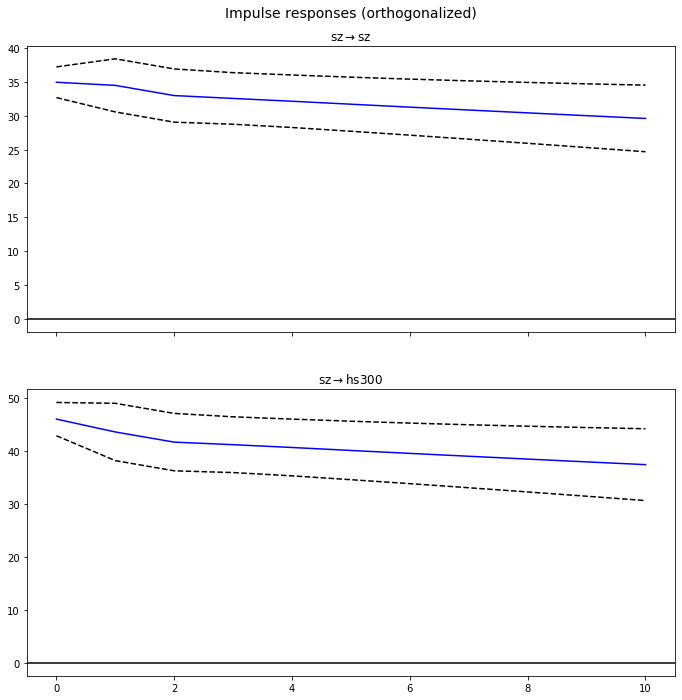

In [3]:
# 脉冲响应分析
irf = res.irf()

fig = irf.plot(orth=True, impulse='sz')
print('对上证指数的脉冲示意图')

## matlab 实现

### VAR 模型

VAR.m
```matlab
function [beta,resid,cov_mat,AIC] = VAR(Y,X,p)
% 注意:只是实现了两变量的VAR模型，思考如何实现任意个变量的VAR
% p - 滞后阶数
% AIC - 信息准则

% 1.估计系数
[ADLy,ADLx] = ADLxx(Y,X,p,p);
[beta1,~,resid1] = regress(ADLy,ADLx);

[ADLy,ADLx] = ADLxx(X,Y,p,p);
[beta2,~,resid2] = regress(ADLy,ADLx);

beta = [beta1';beta2'];
resid = [resid1,resid2];

% 2.估计AIC值(eviews调整自由度之后的)
T = length(ADLy);
cov_mat = resid'*resid/(T-3);
AIC = log(det(cov_mat))+2*(2*p+1)*2/T;

% % 1.载入数据
% data = xlsread('C:\Users\Administrator\Desktop\hourse.xlsx');
% f1 = data(:,2); f2 = data(:,3); e = data(:,6);
% 
% % 2.估计VAR模型
% [beta,resid,AIC] = VAR(f1,e,2);
```

### 脉冲响应函数

OIRF1.m
```matlab
function [beta,IR] = OIRF1(Y,X,num,IMP)

% num - 脉冲期数

% 1.估计VAR模型参数
[beta,~,cov_mat] = VAR(Y,X,1);

% 2.脉冲响应函数
% 2.1 正交化分解，估计P矩阵
P = chol(cov_mat, 'lower');
% 2.2 估计IR,s=1期为ADt,s=k，则为A^(k)Dt
b = beta(:,2:3);
SHOCK = zeros(2,1);
if IMP == 1
    SHOCK(1,1) = 1; 
elseif IMP == 2
    SHOCK(2,1) = 1; 
end
IR = zeros(num,2);
IR(1,:) = b*(P*SHOCK);
for s=2:num, IR(s,:) = (b*IR(s-1,:)')'; end
```